### Submission guidelines

1. Fill in your name in the notebook in the top cell.
2. Fill in the gaps in the code where indicated. <br> Make sure that you:<br> - fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" <br> - **do not leave any `raise NotImplementedErrors`** in the code
3. Do **NOT change the variable names**, however, you can add comments in the code.
4. Do **NOT remove any of the cells** of the notebook!
5. Discussion is allowed, but every student needs to hand a personal version of the lab. Plagiarism will be sanctioned!   
6. Before submitting, restart your kernel & **make sure that every cell runs**.<br>Code that doesn't run will not be scored.<br>The notebooks with all source code, and optional extra files need to be handed in using Ufora.<br> Make sure all your notebooks are already executed when you upload them (i.e. there should be output after the cells). 
7. **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment!<br><span style='color: red'>Do not rename any of the notebooks or files</span>!<br>



In [1]:
NAME = "Cesar Zapata"


Final tip: make sure you have answered every question and filled in all the required code by running through the notebook and searching for *YOUR ANSWER HERE* and *YOUR CODE HERE*!

Good luck!

---

# Lab: Pandas

This lab will focus on data cleanup, analysis and visualization.

Three new libraries will be used: *matplotlib* and *seaborn*, both visualization libraries, and *pandas* a data manipulation library. While Pandas does share some functionality with SQL in regards to data manipulation, Pandas is often more easy to use in an interactive way, as is typically done in data exploration (assuming one is more fluent in Python than SQL).

Pandas enables us to use DataFrames. A DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
A dataframe can be created from a numpy ndarray, a list of dictionaries, and many other options.
Dataframes support many types of data manipulation operations and can be used to plot the data in various ways.
Throughout this lab you will have to get familiar with pandas. The [pandas API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) wil be your first source of information to check when you want to know more about pandas. A second handy reference is the [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

If this is your first pandas experience, we advise to do the [10 minutes of pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html).

Note that all exercises in this lab are meant to be solved using Pandas. Avoid coding functionality that is already available in Pandas. (For example, you should not need any `for` loop in your code!)

## Mimic-III

This lab uses data from the Mimic dataset. However, to avoid SQL queries, we will work with local data (and limit ourselves to the smaller tables).

You can refer to online sources for more details on the data format:
- https://mimic.physionet.org/gettingstarted/overview/
- https://mit-lcp.github.io/mimic-schema-spy/tables/patients.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [145]:
# Either load in the data using the database credentials from last lab.
import psycopg2

try:
    conn = psycopg2.connect(dbname='mimic',
                            user='student',
                            password='dahcc',
                            host="193.190.127.226",
                            port=5432,
                            options='-c statement_timeout=15s')

    admissions = pd.read_sql_query("SELECT * FROM mimiciii.admissions;", conn)
    patients = pd.read_sql_query("SELECT * FROM mimiciii.patients;", conn)
    items = pd.read_sql_query("SELECT * FROM mimiciii.d_items;", conn)
except psycopg2.OperationalError:
    print("Fill in the hostname!")

# Or load them by downloading the files from the MIMIC website.
# These CSV files are part of the MIMIC-III dataset: https://mimic.physionet.org/gettingstarted/dbsetup/

admissions = pd.read_csv('data/ADMISSIONS.csv', parse_dates=['ADMITTIME', 'DISCHTIME', 'EDREGTIME', 'EDOUTTIME']).rename(columns=str.lower)
patients = pd.read_csv('data/PATIENTS.csv', parse_dates=['DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN']).rename(columns=str.lower)
items = pd.read_csv('data/D_ITEMS.csv').rename(columns=str.lower)

Fill in the hostname!


In [146]:
# Note: if you use the downloaded files, do not include them in your submission to Ufora.


In [147]:
admissions.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [148]:
patients.head(5)

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,234,249,F,2075-03-13,NaT,NaT,NaT,0
1,235,250,F,2164-12-27,2188-11-22,2188-11-22,NaT,1
2,236,251,M,2090-03-15,NaT,NaT,NaT,0
3,237,252,M,2078-03-06,NaT,NaT,NaT,0
4,238,253,F,2089-11-26,NaT,NaT,NaT,0


In [149]:
items.head(5)

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,457,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,458,498,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,459,499,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,460,500,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,461,501,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN


## Data Cleanup

Data quality can depend quite a bit depending on the source of the data. Luckily, the MIMIC dataset already has good quality as it is based on the database dumps.

**Verify all ids in all tables are unique.**

In [150]:
number_unique_subject_ids = patients['subject_id'].nunique()
number_subject_records = patients['subject_id'].count()
number_unique_admission_ids = admissions['hadm_id'].nunique()
number_admission_records = admissions['hadm_id'].count()
number_unique_item_ids = items['itemid'].nunique()
number_item_records = items['label'].count()

print(f"unique subject ids: {number_unique_subject_ids}\nsubject records: {number_subject_records}\n")
print(f"unique admissions: {number_unique_admission_ids}\nadmission records: {number_admission_records}")
print(f"unique item ids: {number_unique_item_ids}\nitem records: {number_item_records}")

# Every id in the tables is unique!

unique subject ids: 46520
subject records: 46520

unique admissions: 58976
admission records: 58976
unique item ids: 12487
item records: 12483


In [151]:
print("Subjects:", number_unique_subject_ids, number_subject_records)
print("Admissions:", number_unique_admission_ids, number_admission_records)
print("Items:", number_unique_item_ids, number_item_records)


Subjects: 46520 46520
Admissions: 58976 58976
Items: 12487 12483


The [D_ITEMS documentation](https://mimic.physionet.org/mimictables/d_items/) mentions that the entries originate from 2 different databases, so multiple itemids exist for the same label.
**Find ALL labels that have multiple itemids. (Assume only perfect matches are duplicates, do not bother with abbreviations.)**

In [152]:
# E.g.: "Heart Rate" is a duplicate label
items[(items.itemid == 211) | (items.itemid == 220045)]

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
475,212,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
11498,12712,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN


In [153]:
grouped_lbl = items.groupby('label')['itemid'].nunique() # unique values of id (ignores nan) - grouped by label
duplicate_labels = grouped_lbl[grouped_lbl > 1].index.tolist() # if it appears more than 1 time, put it in the list

print(duplicate_labels)

['2ND ISOLATE', 'ALBUMIN', 'ALCOHOL', 'ALCOHOL 10%DRIP G/HR', 'ALCOHOL 5% DRIP G/HR', 'ALCOHOL GTT ML/HR', 'ALT', 'APROTANIN', 'APROTININE', 'APROTONIN', 'ART Lumen Volume', 'AST', 'ATG', 'Abdominal Assessment', 'Acetylcysteine', 'Acetylcysteine mg/hr', 'Activity', 'Activity Tolerance', 'Acyclovir', 'Adenosine', 'Airway Type', 'Albumin', 'Albumin 25%', 'Albumin 5%', 'Alcohol Gm/hour', 'Ambisome', 'Aminophylline', 'Aminosyn 3.5%', 'Amiodarone', 'Amiodarone mg/hr', 'Ammonia', 'Amphotericin', 'Ampicillin', 'Amylase', 'Anxiety', 'Apnea Interval', 'Aprotinin cc/hr', 'Argatroban', 'Arterial Base Excess', 'Arterial Line ordered on POE', 'Arterial line sutured', 'Assistance Device', 'Assisted Systole', 'Ataxia', 'Ativan', 'Auditory Disturbance', 'Augmented Diastole', 'Autofluorescence AF (Bronch)', 'BAEDP', 'BLADDER PRESSURE', 'BUN', 'Back Care', 'Barrier precautions in place (A-Line)', 'Barrier precautions in place (Bronch)', 'Barrier precautions in place (Intubation)', 'Barrier precautions i

In [154]:
assert("Heart Rate" in duplicate_labels)


**Knowing these duplicate features, describe how would you would work around this issue or adjust the data.**
Describe which assumptions you are making in that approach (in regard to how the data would be used).

YOUR ANSWER HERE

## Feature Engineering

Sometimes you'll want add new (derived) features to a dataset for easier visualisations or machine learning methods.

The following APIs may get you started:

- [Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)
- [Series.dt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html)
- [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)
- [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

**Add a `admit_duration` column**

Calculate the admission time (in days) and add it as a new column `admit_duration` to the admissions dataframe.

In [155]:
admissions['admit_duration'] = (admissions['dischtime'] - admissions['admittime'])
print(admissions['admit_duration'])

0        1 days 03:28:00
1        5 days 11:55:00
2        6 days 18:26:00
3        2 days 20:34:00
4        3 days 12:49:00
              ...       
58971    2 days 17:49:00
58972    0 days 13:10:00
58973    8 days 04:53:00
58974   41 days 10:42:00
58975    1 days 14:35:00
Name: admit_duration, Length: 58976, dtype: timedelta64[ns]


In [156]:
assert("admit_duration" in admissions.columns)


**Add an `admit_age` column**

Calculate the age of patients (in years) for each admission and add it as a new  column `admit_age` to the admissions dataframe. Keep in mind how the dates were changed according to the dataset documentation. (Correct for patients that would be 300 years old - set their age to 89.) Use the `merge` method to link patients to admissions, similar as you would perform a JOIN in SQL.

In [157]:
# print(admissions['religion'].unique())
admissions = admissions.merge(patients, how='left', on='subject_id')
age = (admissions['admittime'][0] - admissions['dob'][0])
# print(admissions['religion'].unique())

admissions['admit_age'] = admissions.apply(lambda adm: ((adm['admittime'].to_pydatetime() - adm['dob'].to_pydatetime()).days / 365.25), axis=1)
print(admissions['admit_age'])


0        64.925394
1        71.129363
2        75.252567
3        39.014374
4        58.948665
           ...    
58971    19.397673
58972    83.449692
58973    42.529774
58974    60.766598
58975    63.718001
Name: admit_age, Length: 58976, dtype: float64


In [158]:
print(f"Before 89y cap: {admissions['admit_age'].max()}")
admissions['admit_age'] = [89 if (age >= 299) else age for age in admissions['admit_age']]
print(f"After 89y cap: {admissions['admit_age'].max()}")

assert('admit_age' in admissions.columns)


Before 89y cap: 311.55373032169746
After 89y cap: 89.0


**Add a `status` column**

Create a new column that indicates if a patient is alive, died inside the hospital, or died outside the hospital
Use `ALIVE`, `HOSPITAL_DEATH`, `DEATH` as possible values.
Add these entries to a new column called `status` in the patients dataframe.

In [193]:
# if the patient did not die in the hospital but has an expired flag -> DEATH
patients['status'] = patients.apply(lambda pat: ('ALIVE' if pat['expire_flag'] != 1 else ('DEATH' if pd.isnull(pat['dod_hosp']) else 'HOSPITAL_DEATH')), axis=1)

print(patients['status'].unique())

['ALIVE' 'HOSPITAL_DEATH' 'DEATH']


In [194]:
assert('status' in patients.columns)


## Data Analysis

Often, one starts with exploratory data analysis to get a feel of the structure and quality of the data. A need for additional cleanup may become apparant.
In later stages, you will have a better view of what you wish to learn from the data.

**How many admissions stated a `BUDDHIST` religion?** 

In [195]:
num_buddhists = len(admissions[admissions['religion'] == 'BUDDHIST'])
print(num_buddhists)

# print(admissions['religion'])

267


In [196]:
print(f"There are {num_buddhists} buddhists.")

There are 267 buddhists.


**How many admissions stated a `MARRIED` marital status?**

In [197]:
num_married = len(admissions[admissions['marital_status'] == 'MARRIED'])
print(num_married)
# print(admissions['marital_status'])


24239


In [198]:
print(f"There are {num_married} married people.")

There are 24239 married people.


**How many admissions stated a `MARRIED` `BUDDIST`?**

In [199]:
num_married_buddhists = len(admissions[(admissions['religion'] == 'BUDDHIST') & (admissions['marital_status'] == 'MARRIED')])
print(num_married_buddhists)


133


In [200]:
print(f"There are {num_married_buddhists} married buddhists.")


There are 133 married buddhists.


**Create a dataframe showing the counts of every religion (rows) and every marital status (columns).**

Use one of the following:
- [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)
- [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)
- [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [201]:
religion_marital_df = pd.crosstab(admissions['religion'], admissions['marital_status'])
# print(admissions.keys())

print(type(religion_marital_df))
religion_marital_df

<class 'pandas.core.frame.DataFrame'>


marital_status,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED
religion,,,,,,,
7TH DAY ADVENTIST,2,0,42,1,23,0,5
BAPTIST,2,0,10,0,10,0,6
BUDDHIST,8,1,133,1,63,0,12
CATHOLIC,1265,5,9488,219,4347,52,2899
CHRISTIAN SCIENTIST,14,0,149,16,122,2,34
EPISCOPALIAN,86,0,362,3,128,1,113
GREEK ORTHODOX,23,0,246,4,73,1,71
HEBREW,0,0,11,0,2,0,3
HINDU,0,0,47,0,12,1,10


In [202]:
assert('DIVORCED' in religion_marital_df.columns)
assert('BAPTIST' in religion_marital_df.index)


**Use `describe` to find the summary statistics of `admit_duration` and `admit_age`.**

In [203]:
print(f"Admit duration:\n{admissions['admit_duration'].describe()}\n")
print(f"\nAdmit age:\n{admissions['admit_age'].describe()}\n")

Admit duration:
count                         58976
mean     10 days 03:12:50.349294628
std      12 days 10:57:37.335463321
min               -1 days +01:19:00
25%                 3 days 17:51:00
50%                 6 days 11:12:30
75%                11 days 19:05:00
max               294 days 15:51:00
Name: admit_duration, dtype: object


Admit age:
count    58976.000000
mean        55.046911
std         27.164346
min          0.000000
25%         43.487337
50%         61.756331
75%         75.885010
max         89.000000
Name: admit_age, dtype: float64



## Visualisations

Pandas provides [methods](https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#api-dataframe-plotting) to visualise dataframes/series, though controlling the exact layout may be less intuitive. Alternatively, [matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html) provides a fine-grained API for creating visualisations. You will need more calls, but may find it easier to understand as each step is more explicit.

<Axes: ylabel='status'>

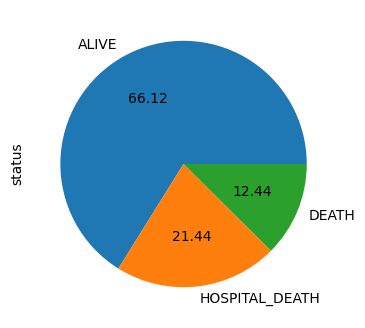

In [204]:
# E.g.: Pandas oneliner
patients.status.value_counts().plot.pie(autopct='%.2f', figsize=(4,4))

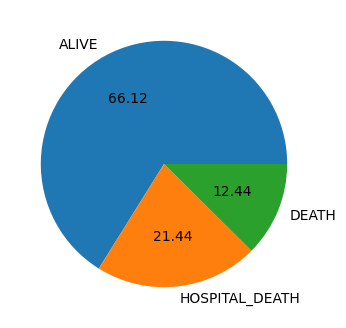

In [205]:
# E.g.: Matplotlib
plot_data = patients.status.value_counts()
fig = plt.figure(figsize=(4,4))
plt.pie(plot_data.values, labels=plot_data.index, autopct='%.2f')
plt.show()

**Create a piechart for both genders.**

Plot 2 piecharts next to each other as above, showing the status of patients, one for each gender.

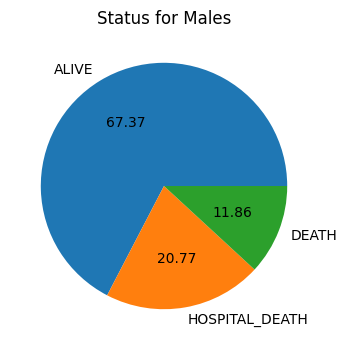

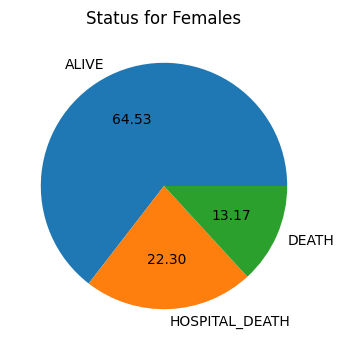

In [212]:
# print(patients.keys())
plot_status_male = patients[patients['gender'] == 'M'].value_counts(subset=patients['status'])
fig = plt.figure(figsize=(4,4))
plt.pie(plot_status_male, labels=plot_status_male.index, autopct='%.2f')
plt.title("Status for Males")
plt.show()


plot_status_female = patients[patients['gender'] == 'F'].value_counts(subset=patients['status'])
fig = plt.figure(figsize=(4,4))
plt.pie(plot_status_female, labels=plot_status_female.index, autopct='%.2f')
plt.title("Status for Females")
plt.show()

**Histogram of admission time**

Create a histogram that shows how many admissions take place at each hour of the day. The x-axis should show the time of day, ranging from 0 to 23 (buckets of one hour). The y-axis should show the number of admissions.

**Create a scatter plot that show admission duration per age**

Use the alpha parameter to better visualise the concentration of points. Use the figure size or axis limits to ensure enough detail is visible.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Create a stack bargraph**

Visualise how the number of admission types (`admission_type`) evolves throughout different age groups. Define age groups to somewhat aggregate the data in a way that makes sense (e.g. groups spanning an age range of 5 years). Ensure your axes are labeled and use custom labels to indicate the age groups. In other words: you figure should be understandable without any additional explanation.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()